<a href="https://colab.research.google.com/github/eric157/Stats-Labs/blob/main/Verification_of_LLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1**

The objective of this assignment is to verify the Law of Large Numbers (LLN) for sample proportion using Monte Carlo simulations. The LLN states that the sample proportion of successes in Bernoulli trials converges to the population proportion as the number of trials increases.

Mathematically, the LLN can be expressed as:

$$
P \left( \left| \bar{p}_n - p \right| < \epsilon \right) \to 1 \text{ as } n \to \infty,
$$

where:

$$
\bar{p}_n = \frac{X_n}{n}
$$

In the context of a coin-tossing experiment, this implies that the long-run relative frequency of heads converges to the true unknown probability of heads with probability nearly 1 if the coin is tossed a sufficiently large number of times.

### Steps for Verification through Monte Carlo Simulation:
1. Generate n random observations from a Bernoulli distribution with probability of success p.
2. Calculate the sample proportion:

$$
\bar{p} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

3. Repeat steps 1-2, R = 10,000 times.
4. Find the proportion of the values
$$
\begin{aligned}
| \bar{p}_r - p | \\
\text{(for } r = 1, 2, \dots, R \text{)} \\
\text{that lie within the interval } \pm \epsilon
\end{aligned}
$$



### Parametric Combinations:
- R = 10,000
- n = (20, 50, 100, 200, 300, 500)
- p = (0.1, 0.3, 0.5)
- ε = (0.01, 0.05, 0.10)


p = 0.1, n = 20, epsilon = 0.01, Proportion within interval: 0.2822
p = 0.1, n = 20, epsilon = 0.05, Proportion within interval: 0.4778
p = 0.1, n = 20, epsilon = 0.1, Proportion within interval: 0.7476
p = 0.1, n = 50, epsilon = 0.01, Proportion within interval: 0.1826
p = 0.1, n = 50, epsilon = 0.05, Proportion within interval: 0.7676
p = 0.1, n = 50, epsilon = 0.1, Proportion within interval: 0.9672
p = 0.1, n = 100, epsilon = 0.01, Proportion within interval: 0.2518
p = 0.1, n = 100, epsilon = 0.05, Proportion within interval: 0.9028
p = 0.1, n = 100, epsilon = 0.1, Proportion within interval: 0.9974
p = 0.1, n = 200, epsilon = 0.01, Proportion within interval: 0.3541
p = 0.1, n = 200, epsilon = 0.05, Proportion within interval: 0.9802
p = 0.1, n = 200, epsilon = 0.1, Proportion within interval: 1.0000
p = 0.1, n = 300, epsilon = 0.01, Proportion within interval: 0.4310
p = 0.1, n = 300, epsilon = 0.05, Proportion within interval: 0.9970
p = 0.1, n = 300, epsilon = 0.1, Proportion 

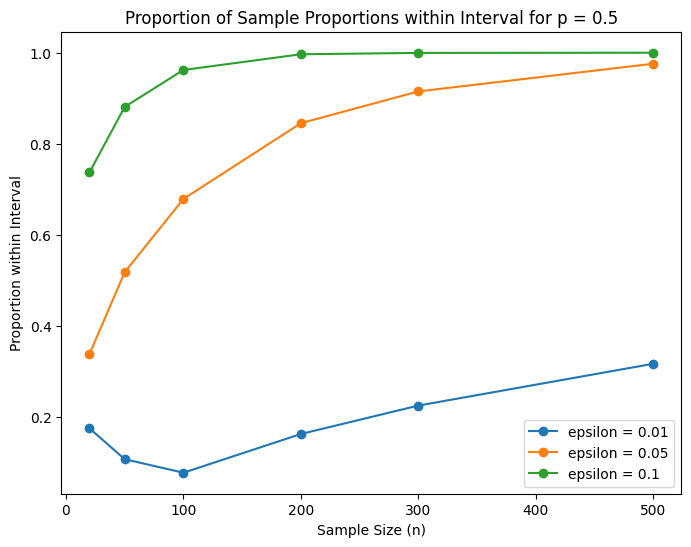

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_simulation_single(p, n, epsilon, R):
    count_within_interval = 0
    for _ in range(R):
        trials = np.random.binomial(1, p, n)
        sample_proportion = trials.mean()
        if abs(sample_proportion - p) < epsilon:
            count_within_interval += 1
    return count_within_interval / R

def monte_carlo_simulation(n_values, p_values, epsilon_values, R=10000):
    results = {}
    for p in p_values:
        results[p] = {}
        for n in n_values:
            for epsilon in epsilon_values:
                proportion_within_interval = monte_carlo_simulation_single(p, n, epsilon, R)
                results[p][(n, epsilon)] = proportion_within_interval
    return results

n_values = [20, 50, 100, 200, 300, 500]
p_values = [0.1, 0.3, 0.5]
epsilon_values = [0.01, 0.05, 0.10]
R = 10000

results = monte_carlo_simulation(n_values, p_values, epsilon_values, R)

for p in results:
    for (n, epsilon) in results[p]:
        print(f"p = {p}, n = {n}, epsilon = {epsilon}, Proportion within interval: {results[p][(n, epsilon)]:.4f}")

p_to_plot = 0.5
fig, ax = plt.subplots(figsize=(8, 6))

for epsilon in epsilon_values:
    proportion_within_interval = [results[p_to_plot].get((n, epsilon), 0) for n in n_values]
    ax.plot(n_values, proportion_within_interval, marker='o', label=f"epsilon = {epsilon}")

ax.set_xlabel("Sample Size (n)")
ax.set_ylabel("Proportion within Interval")
ax.set_title("Proportion of Sample Proportions within Interval for p = 0.5")
ax.legend()

plt.show()



*   As the sample size n increases, the proportion of sample proportions within the interval ±ε tends to approach 1, confirming the Law of Large Numbers.
*   For smaller sample sizes (e.g., n = 20), the proportion within the interval is much lower, especially for smaller values of ε, because the sample proportion has a higher variance.
*   As the tolerance (epsilon) increases, the proportion of sample proportions within the interval increases, as it becomes easier for the sample proportion to fall within a wider range.

###For p = 0.1 and n = 500:


*   With epsilon = 0.01, the proportion within the interval is 0.5.
*   With epsilon = 0.1, it increases to 1.0000, showing that the sample proportion is very close to the population proportion when the tolerance is larger.

**This demonstrates the convergence of sample proportions to the true probability (p) as the sample size increases and tolerance is adjusted.**





# **Problem 2**

The objective of this assignment is to verify the Law of Large Numbers (LLN) for the sample mean of a Poisson distribution using Monte Carlo simulations. This verification also demonstrates the consistency of the sample mean as an estimator of the population mean for the Poisson distribution.

The Law of Large Numbers (LLN) states that if Xₙ is the sample mean of a random sample of size n from a probability distribution (either discrete or continuous) with mean μ, then for every ε > 0:

$$
P \left( | Xₙ - μ | < ε \right) → 1 \text{ as } n → ∞
$$

where:

$$
Xₙ = \frac{X₁ + X₂ + ... + Xn}{n}
$$

In the context of the Poisson distribution, this implies that the sample mean converges to the true population mean λ as the number of observations n increases.

### Steps for Verification through Monte Carlo Simulation:
1. Generate random samples of size n from a Poisson distribution with mean λ.
2. Calculate the sample mean:

$$
x = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

3. Repeat steps 1-2, 10,000 times.
4. Find the proportion of sample means that lie within the interval ±ε of the true value λ.

### Parametric Combinations:
- R = 10,000
- n = (20, 50, 100, 200, 300, 500)
- λ = (0.1, 0.5, 1.0, 1.5, 2.0)
- ε = (0.01, 0.05, 0.10)

λ = 0.1, n = 20, epsilon = 0.01, Proportion within interval: 0.2766
λ = 0.1, n = 20, epsilon = 0.05, Proportion within interval: 0.4500
λ = 0.1, n = 20, epsilon = 0.1, Proportion within interval: 0.7279
λ = 0.1, n = 50, epsilon = 0.01, Proportion within interval: 0.1797
λ = 0.1, n = 50, epsilon = 0.05, Proportion within interval: 0.7444
λ = 0.1, n = 50, epsilon = 0.1, Proportion within interval: 0.9573
λ = 0.1, n = 100, epsilon = 0.01, Proportion within interval: 0.2427
λ = 0.1, n = 100, epsilon = 0.05, Proportion within interval: 0.8845
λ = 0.1, n = 100, epsilon = 0.1, Proportion within interval: 0.9973
λ = 0.1, n = 200, epsilon = 0.01, Proportion within interval: 0.3455
λ = 0.1, n = 200, epsilon = 0.05, Proportion within interval: 0.9769
λ = 0.1, n = 200, epsilon = 0.1, Proportion within interval: 1.0000
λ = 0.1, n = 300, epsilon = 0.01, Proportion within interval: 0.4100
λ = 0.1, n = 300, epsilon = 0.05, Proportion within interval: 0.9931
λ = 0.1, n = 300, epsilon = 0.1, Proportion 

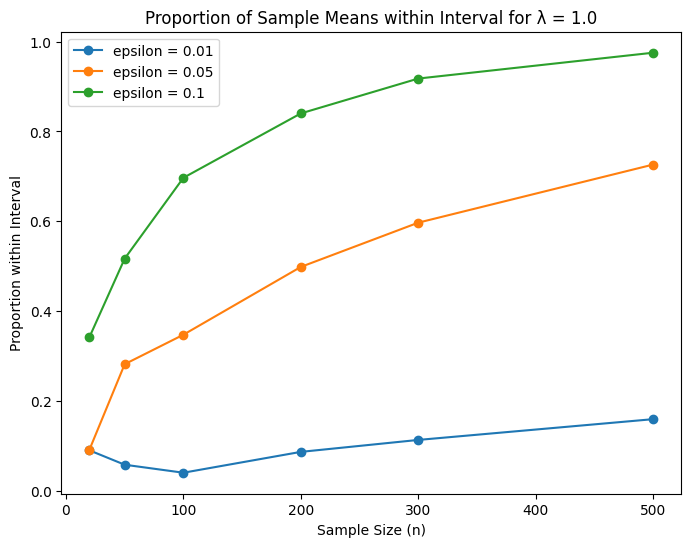

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_poisson_single(lambd, n, epsilon, R):
    count_within_interval = 0
    for _ in range(R):
        sample = np.random.poisson(lambd, n)
        sample_mean = sample.mean()
        if abs(sample_mean - lambd) < epsilon:
            count_within_interval += 1
    return count_within_interval / R

def monte_carlo_poisson_simulation(n_values, lambda_values, epsilon_values, R=10000):
    results = {}
    for lambd in lambda_values:
        results[lambd] = {}
        for n in n_values:
            for epsilon in epsilon_values:
                proportion_within_interval = monte_carlo_poisson_single(lambd, n, epsilon, R)
                results[lambd][(n, epsilon)] = proportion_within_interval
    return results

n_values = [20, 50, 100, 200, 300, 500]
lambda_values = [0.1, 0.5, 1.0, 1.5, 2.0]
epsilon_values = [0.01, 0.05, 0.10]
R = 10000

results = monte_carlo_poisson_simulation(n_values, lambda_values, epsilon_values, R)

for lambd in results:
    for (n, epsilon) in results[lambd]:
        print(f"λ = {lambd}, n = {n}, epsilon = {epsilon}, Proportion within interval: {results[lambd][(n, epsilon)]:.4f}")

lambda_to_plot = 1.0
fig, ax = plt.subplots(figsize=(8, 6))

for epsilon in epsilon_values:
    proportion_within_interval = [results[lambda_to_plot].get((n, epsilon), 0) for n in n_values]
    ax.plot(n_values, proportion_within_interval, marker='o', label=f"epsilon = {epsilon}")

ax.set_xlabel("Sample Size (n)")
ax.set_ylabel("Proportion within Interval")
ax.set_title(f"Proportion of Sample Means within Interval for λ = {lambda_to_plot}")
ax.legend()

plt.show()



*   As
n increases, the proportion of sample means within the interval around
λ increases. This is consistent with the Law of Large Numbers, which states that the sample mean will converge to the population mean as the sample size grows.
For example, at
λ=0.1, as
n increases from 20 to 500, the proportion of sample means within the interval increases from about 0.2 to 1.000 (for
ϵ=0.1).
*   The smaller the tolerance
ϵ, the less likely the sample mean is to fall within that range, especially for smaller sample sizes.For example, for
λ=0.1, when
n=20 and
ϵ=0.01, the proportion within the interval is only 0.2, whereas for
ϵ=0.1, the proportion increases to 0.7.
*   The proportion of sample means falling within the tolerance interval is higher for larger
λ. For instance, at
λ=2.0, even for smaller sample sizes, the proportion within the interval is noticeably higher than for smaller
λ values.
*   The results show that as
n increases, the proportion of sample means within the interval for each
λ approaches 1 (especially for larger
n and larger
ϵ).


**The simulation successfully verifies the Law of Large Numbers (LLN) for the Poisson distribution, The sample mean converges to the true population mean λ as the sample size n increases, The results highlight the consistency of the sample mean as an estimator of the population mean**


